# Data Wrangling


  <h1>⚪ Preparation</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

  <h1>⚪ Gathering Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


In [2]:
customers_df = pd.read_csv("./Dataset/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [3]:
orders_df = pd.read_csv("./Dataset/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [4]:
products_df = pd.read_csv("./Dataset/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [5]:
sales_df = pd.read_csv("./Dataset/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


  <h1>⚪ Assessing Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


## Assess the customers table


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [7]:
# Check missing value in table customers

customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [8]:
# Check duplicate value in table customers

print("Total duplicate value:", customers_df.duplicated().sum())

Total duplicate value: 6


In [9]:
# Check Statistics of table customers

customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


## Assess the order table


In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [11]:
# Change the order_id attribute to string

orders_df["order_id"] = orders_df["order_id"].astype(str)

#  Check the data type of order_id attribute

orders_df["order_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: order_id
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [12]:
# Change the delivery_date attribute to datetime

orders_df["delivery_date"] = pd.to_datetime(orders_df["delivery_date"])

# Check the data type of the delivery_date attribute

orders_df["delivery_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: delivery_date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [13]:
# Check duplicate value in table orders

print("Total duplicate value:", orders_df.duplicated().sum())

orders_df.describe()

Total duplicate value: 0


,customer_id,payment,delivery_date
count,1000.000000,1000.000000,1000
mean,506.640000,33972.936000,2021-06-10 20:31:12
min,1.000000,10043.000000,2021-01-03 00:00:00
25%,275.250000,21329.250000,2021-03-28 00:00:00
50%,515.000000,33697.500000,2021-06-11 12:00:00
75%,737.250000,46249.000000,2021-08-24 06:00:00
max,1000.000000,59910.000000,2021-11-20 00:00:00
std,277.115502,14451.609047,NaN


<Axes: xlabel='age'>

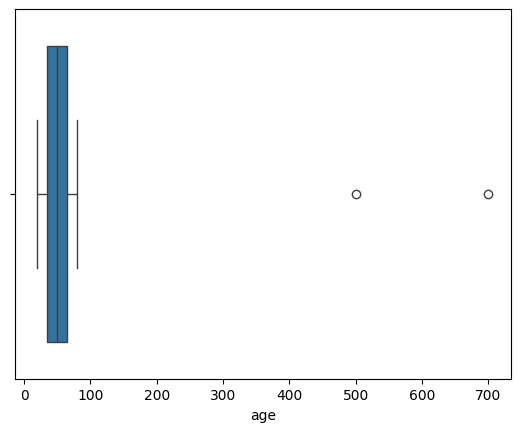

In [14]:
# plot the boxplot for attribute age

sns.boxplot(x=customers_df["age"])

## Assess the product table


In [15]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [16]:
# Check duplicate value in table products

print("Total dupliacate value: ", products_df.duplicated().sum())

products_df.describe()

Total dupliacate value:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


## Assess the sales table


In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [18]:
# Check missing value in table sales

sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [19]:
# Check duplicate values in table sales

print("Total duplicate value: ", sales_df.duplicated().sum())

sales_df.describe()

Total duplicate value:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


## Summary of the assessment process


| NO  |  TABLE NAME  |                                      TIPE DATA                                      |                   MISSING VALUE                    |        DUPLICATE DATA         |             INACCURATE VALUE             |
| :-: | :----------: | :---------------------------------------------------------------------------------: | :------------------------------------------------: | :---------------------------: | :--------------------------------------: |
| 1.  | customers_df |         There are two invalid data types in column customer_id & zip_code.          |   There are 18 missing values in column gender.    | There are 6 duplicate values. | There is inaccurate value in column age. |
| 2.  |  orders_df   | There are three invalid data types in column order_id, order_date, & delivery_date. |                         -                          |               -               |                    -                     |
| 3.  | products_df  |                There is one invalid data_types in column product_id.                |                         -                          | There are 6 duplicate values. |                    -                     |
| 4.  |   sales_df   |   There are three invalid data types in column sales_id, order_id, & product_id.    | There are 19 missing values in column total_price. |               -               |                    -                     |


  <h1>⚪ Cleaning Data</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


## Cleaning the table customer


## Handling format data type


In [20]:
# Change the customer_id attribute to object(string)

customers_df["customer_id"] = customers_df["customer_id"].astype(str)

# Check the data type of customer_id attribute

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   object
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.9+ KB


In [21]:
# Change the zip_code attribute to object(string)

customers_df["zip_code"] = customers_df["zip_code"].astype(str)

# Check the data type of zip_code attribute

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   object
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   object
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.9+ KB


## Handling missing values


In [22]:
# Check the null value in table customers

customers_df.loc[customers_df["gender"].isna()]

# customers_df[customers_df['gender'].isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [23]:
# Identify dominant value in column gender

customers_df.gender.value_counts()

gender
Prefer not to say    731
Male                 143
Female               115
Name: count, dtype: int64

In [24]:
# Impute the dominant value into null values

customers_df.fillna(value="Prefer not to say", inplace=True)

In [25]:
# Check the missing values again

customers_df.isna().sum().sum()

0

## Handling duplicate values


In [26]:
# Drop duplicate values

customers_df.drop_duplicates(inplace=True)

# Check the duplicate values again

print("Total duplicate values: ", customers_df.duplicated().sum())

Total duplicate values:  0


## Handling inaccurate values


In [27]:
# Filter the data to find the customers who have inaccurate values in age column

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [28]:
# Replace the inaccurate values of age column with 70 (This might happen because of typo)

customers_df["age"].replace(customers_df.age.max(), value=70, inplace=True)

In [29]:
# Check the customers who have inaccurate values in age column again

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [30]:
# Replace the inaccurate values of age column with 50 (This might happen because of typo)

customers_df["age"].replace(customers_df.age.max(), value=50, inplace=True)

In [31]:
# Check the customers who have inaccurate values in age column again

customers_df.loc[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [32]:
# Check the statistics of table customers again

customers_df.describe()

,age
count,1000.000000
mean,49.860000
std,17.647828
min,20.000000
25%,34.000000
50%,50.000000
75%,65.000000
max,80.000000


## Cleaning the table order


## Handling format data type


In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   object        
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.2+ KB


In [34]:
# Change the order_id & customer_id attributes to object(string)

orders_df["order_id"] = orders_df["order_id"].astype(str)

orders_df["customer_id"] = orders_df["customer_id"].astype(str)

# Check the data type of order_id & customer_id attributes

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   object        
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   object        
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.2+ KB


In [35]:
# Change the data type order_date into datetime

orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])

# Check the datra type of order_date again

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   object        
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 39.2+ KB


## Cleaning the table products


## Handling format data type


In [36]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [37]:
# Change the product_id attribute to object(string)

products_df["product_id"] = products_df["product_id"].astype(str)

# Check the data type of product_id attribute

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   object
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(2), object(6)
memory usage: 79.3+ KB


## Handling duplicate value


In [38]:
# Drop duplicate values in column

products_df.loc[products_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [39]:
products_df.loc[
    products_df["product_id"] == "146"
]  # This means the data shown in the table above is the only duplicate value

,product_id,product_type,product_name,size,colour,price,quantity,description
147,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"


In [40]:
# Drop duplicate values

products_df.drop_duplicates(inplace=True)

# Check the duplicate values again

print("Total duplicate values: ", products_df.duplicated().sum())

Total duplicate values:  0


## Cleaning the table sales


## Handling format data type


In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [42]:
#  Change the data type of sakes_id, order_id, & product_id attributes to object(string)

sales_df["sales_id"] = sales_df["sales_id"].astype(str)

sales_df["order_id"] = sales_df["order_id"].astype(str)

sales_df["product_id"] = sales_df["product_id"].astype(str)

#  Check the data type of sales_id, order_id, & product_id attributes

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   object 
 1   order_id        5000 non-null   object 
 2   product_id      5000 non-null   object 
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


## Handling Missing Values


In [43]:
# Check missing value

sales_df.loc[sales_df.isna().any(axis=1)]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [44]:
# Since the total_price attribute is the result of quantity * price, we can impute the missing value with: total_price = quantity * price_per_unit

sales_df["total_price"] = sales_df["quantity"] * sales_df["price_per_unit"]

In [45]:
# Check the missing value again

sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

  <h1>⚪ End of the cleaning process</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>


# Exploratory Data Analysis


## Business Question


| NO  |                                 BUSINESS QUESTION                                 |
| :-: | :-------------------------------------------------------------------------------: |
| 1.  | How have the company's sales and revenue performance been in the last few months? |
| 2.  |                      What products sell the most and least?                       |
| 3.  |                    What are the demographics of our customers?                    |
| 4.  |               When was the last time a customer made a transaction?               |
| 5.  |            How often has a customer purchased in the last few months?             |
| 6.  |            How much money have customers spent in the last few months?            |


## Explore all the data from dataset


### EDA customers_df


In [46]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1000,1000,1000,1000.000000,1000,1000,1000,1000,1000
unique,1000,1000,3,NaN,1000,955,961,8,1
top,1,fulan 1,Prefer not to say,NaN,8606 Victoria TerraceSuite 560,789,East Sophia,South Australia,Australia
freq,1,1,742,NaN,1,3,3,139,1000
mean,NaN,NaN,NaN,49.860000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,17.647828,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN


In [47]:
# Check the demography customers based on gender

customers_df.groupby(by="gender").agg(
    {"customer_id": "nunique", "age": ["max", "min", "mean", "std"]}
)

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.706199  17.648386

In [48]:
# Check the distribution of the number of customers by city.

customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [49]:
# Check the distribution of the number of customers by state.

customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

### EDA orders_df


In [50]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   object        
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 39.2+ KB


In [51]:
# Substract the order date and delivery date to get the delivery time

delivery_time = orders_df["delivery_date"] - orders_df["order_date"]

delivery_time = delivery_time.apply(lambda x: x.total_seconds())

orders_df["delivery_time"] = round(delivery_time / 86400)

In [52]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000,1000,1000.000000,1000,1000,1000.000000
unique,1000,617,NaN,NaN,NaN,NaN
top,1,571,NaN,NaN,NaN,NaN
freq,1,6,NaN,NaN,NaN,NaN
mean,NaN,NaN,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,NaN,NaN,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,NaN,NaN,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,NaN,NaN,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,NaN,NaN,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,NaN,NaN,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000


### EDA orders_df and customers_df


In [53]:
# Define customers that already orders with Active, else is Non-Active

customer_id_in_orders_df = orders_df.customer_id.to_list()

customers_df["status"] = customers_df["customer_id"].apply(
    lambda x: "Active" if x in customer_id_in_orders_df else "Non Active"
)

customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
641,640,fulan 640,Prefer not to say,49,7427 Stark CrescentSuite 975,5295,Lincolnchester,Queensland,Australia,Active
700,699,fulan 699,Prefer not to say,79,4959 James HillApt. 613,2027,Westfurt,Western Australia,Australia,Non Active
860,856,fulan 856,Prefer not to say,34,41 Toby TrailSuite 244,5925,North Jacksonstad,Northern Territory,Australia,Non Active
416,416,fulan 416,Prefer not to say,21,59 Gibson MeadowApt. 565,4767,Langworthville,New South Wales,Australia,Active
487,487,fulan 487,Male,21,7199 Caleb StreetSuite 174,4113,South Amelie,Victoria,Australia,Non Active


<img src="./assets/numpy-array-tolist.png" alt="">

<style>
    img {
        display: flex;
        align-items: center;
        margin: auto;
        height: 400px;
        width: 400px;
    }
</style>


In [54]:
# Show total number of Active customer and Non Active customer

customers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    383
Name: customer_id, dtype: int64

In [55]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [56]:
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,Active
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,Non Active
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,Non Active
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,Non Active
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,Non Active


In [57]:
# Merge orders_df and customers_df

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)

orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [58]:
# Total orders based on city

orders_customers_df.groupby(by="city").order_id.nunique().sort_values(
    ascending=False
).reset_index().head(10)

# The `reset_index()` function is used to reset the index of a DataFrame so the city names become a regular column in the DataFrame rather than the index.

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [59]:
# Total aorder based on state

orders_customers_df.groupby(by="state").order_id.nunique().sort_values(
    ascending=False
).reset_index()

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


In [60]:
# Total order based on gender

orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(
    ascending=False
).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


In [61]:
# Total order based on age group

orders_customers_df["age_group"] = orders_customers_df.age.apply(
    lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults")
)

orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(
    ascending=False
).reset_index()

,age_group,order_id
0,Adults,681
1,Seniors,226
2,Youth,93


### EDA products_df and sales_df


In [64]:
products_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,1260,3,35,8,7,NaN,NaN,1260
top,0,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,420,70,252,180,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,NaN,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,NaN,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [65]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000,5000,5000,5000.000000,5000.00000,5000.000000
unique,5000,993,1233,NaN,NaN,NaN
top,0,77,78,NaN,NaN,NaN
freq,1,12,13,NaN,NaN,NaN
mean,NaN,NaN,NaN,103.501600,1.99240,206.360000
std,NaN,NaN,NaN,9.195004,0.80751,86.357457
min,NaN,NaN,NaN,90.000000,1.00000,90.000000
25%,NaN,NaN,NaN,95.000000,1.00000,112.000000
50%,NaN,NaN,NaN,102.000000,2.00000,204.000000
75%,NaN,NaN,NaN,112.000000,3.00000,285.000000


In [71]:
#  Check product with the highest price

products_df.sort_values(by="price", ascending=False).head(1)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"


In [70]:
# Check product with the lowest price

products_df.sort_values(by="price", ascending=True).head(1)

,product_id,product_type,product_name,size,colour,price,quantity,description
583,578,Jacket,Bomber,L,green,90,78,"A green coloured, L sized, Bomber Jacket"


In [73]:
# Check information about products based on product type

products_df.groupby(by="product_type").agg(
    {"product_id": "nunique", "quantity": "sum", "price": ["max", "min"]}
)

product_id quantity price    
                nunique      sum   max min
product_type                              
Jacket              420    25387   119  90
Shirt               420    25263   119  92
Trousers            420    25139   119  90

In [75]:
# Check information about products based on product name

products_df.groupby(by="product_name").agg(
    {"product_id": "nunique", "quantity": "sum", "price": ["max", "min"]}
)

product_id quantity price     
                     nunique      sum   max  min
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204   115   92
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [88]:
products_df.dtypes

product_id      object
product_type    object
product_name    object
size            object
colour          object
price            int64
quantity         int64
description     object
dtype: object

In [89]:
sales_df.dtypes

sales_id          object
order_id          object
product_id        object
price_per_unit     int64
quantity           int64
total_price        int64
dtype: object

In [91]:
# Merge table products and sales

sales_products_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id",
)

sales_products_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [100]:
# Check information about product sales based on type product

sales_products_df.groupby(by="product_type").agg(
    {"sales_id": "nunique", "quantity_x": "sum", "total_price": "sum"}
).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Trousers,1683,3360,341174
Shirt,1641,3259,333600


In [101]:
# Check information about product sales based on product name

sales_products_df.groupby(by="product_name").agg(
    {"sales_id": "nunique", "quantity_x": "sum", "total_price": "sum"}
).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


### EDA all dataset


In [103]:
# Merge the orders_customers_df and products_sales_df

all_df = pd.merge(
    left=sales_products_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [105]:
# Check the buyers preferences based on state and product type

all_df.groupby(by=["state", "product_type"]).agg(
    {"quantity_x": "sum", "total_price": "sum"}
)

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [106]:
# Check the buyers preferences based on state and gender

all_df.groupby(by=["state", "gender"]).agg({"quantity_x": "sum", "total_price": "sum"})

quantity_x  total_price
state                        gender                                    
Australian Capital Territory Female                    190        19555
                             Male                      208        21623
                             Prefer not to say         858        89264
New South Wales              Female                    179        18452
                             Male                      215        22248
                             Prefer not to say         880        91044
Northern Territory           Female                    154        15741
                             Male                      110        11063
                             Prefer not to say         821        85050
Queensland                   Female                    173        17959
                             Male                      161        16768
                             Prefer not to say        1035       107335
South Australia              Female                    176        18352
                             Male                      213        22043
                             Prefer not to say        1036       107421
Tasmania                     Female                    204        21332
                             Male                      151        15526
                             Prefer not to say         823        85237
Victoria                     Female                    208        21343
                             Male                      236        24626
                             Prefer not to say         719        74388
Western Australia            Female                    123        12670
                             Male                       49         5091
                             Prefer not to say        1040       107669

In [107]:
# Check Buyers preferences based on state and age_group

all_df.groupby(by=["state", "age_group"]).agg(
    {"quantity_x": "sum", "total_price": "sum"}
)

quantity_x  total_price
state                        age_group                         
Australian Capital Territory Adults            892        92764
                             Seniors           194        20331
                             Youth             170        17347
New South Wales              Adults            715        73791
                             Seniors           454        47276
                             Youth             105        10677
Northern Territory           Adults            750        77612
                             Seniors           246        25137
                             Youth              89         9105
Queensland                   Adults            958        99527
                             Seniors           376        39018
                             Youth              35         3517
South Australia              Adults           1056       109608
                             Seniors           298        30943
                             Youth              71         7265
Tasmania                     Adults            731        75998
                             Seniors           289        29623
                             Youth             158        16474
Victoria                     Adults            824        85210
                             Seniors           169        17535
                             Youth             170        17612
Western Australia            Adults            863        89597
                             Seniors           250        25544
                             Youth              99        10289

  <h1>⚪ End of the EDA process</h1>

  <style>
    h1 {
      color:darkblue;
      text-align: center;
      vertical-align: middle;
      border-radius: 67px;
      border: 1px solid #fff;
      background: linear-gradient(
        180deg,
        #d9d9d9 82.92%,
        rgba(217, 217, 217, 0) 100%
      );
      box-shadow: 15px 13px 8.2px 9px rgba(0, 0, 0, 0.25);
    }
  </style>
